In [1]:
import pandas as pd
import livelossplot
import keras
from keras import Sequential
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [2]:
pip install livelossplot

Note: you may need to restart the kernel to use updated packages.


In [3]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


Define Your Convolutional Neural Network
Build the CNN with the following layers:

    The input layer is a 2D convolutional layer with the following parameters:
        28 outputs
        Convolution window size: 3x3
        Input size: 28x28
        Activation function: ReLU
    The first hidden layer is a 2D max pooling layer with a pool size of 2x2.
    The second hidden layer is a flattening layer.
    The third hidden layer is a fully connected layer with:
        128 units
        Activation function: ReLU
    The output layer is a fully connected layer with:
        10 units
        Activation function: Softmax

Choosing Hyperparameters
Build the network using the following parameters:

    Optimizer: Adam
    Loss function: sparse_categorical_crossentropy
    Metrics: accuracy
    Epochs: 100

Training Network

    Use Keras to implement the network described and train your data.
    Test the model using the test set (x_test and y_test).

Note:
Your code should return the model and the test results (loss and accuracy). 

In [4]:
x_train = x_train.reshape(60000, 28, 28, 1)/255
x_test = x_test.reshape(10000, 28, 28, 1)/255

In [5]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28, 1)
(60000,)


In [6]:
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        


digit =  8


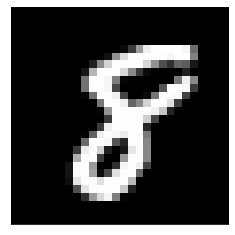

In [7]:
#pick an number to display one of the images
image=777
#use matplotlib to plot an image
picture = x_train[image]
picture = picture.reshape(28,28) 

# Display the labelled digit for the picture
lbl = y_train[image]
print("\ndigit = ", lbl)

# Print a 'picture' of the number
plt.imshow(picture, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show() 

In [8]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

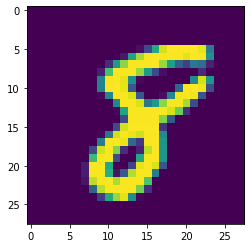

In [9]:
plt.imshow(picture)

In [10]:
x_train = x_train/255
x_test = x_test/255

In [11]:
# Add layersfrom keras.models import Sequential
model = Sequential()

### Convolutional Layers ###
# Convolutional Layer
from keras.layers import Conv2D
model.add(Conv2D(28, (3, 3), input_shape=(28, 28, 1), activation='relu'))

# Max Pooling layer
from keras.layers import MaxPooling2D
model.add(MaxPooling2D(pool_size=(2, 2)))

#add flattening layer
from keras.layers import Flatten
model.add(Flatten())


### 'ANN Layers' ###
#add a dense layer
from keras.layers import Dense
model.add(Dense(units=128, activation='relu'))

#add a dense hidden layer
model.add(Dense(units=64, activation='relu'))

#add softmax activation on dense layer for output
model.add(Dense(units=10, activation='softmax'))

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#use line below if not using livelossplot
#model.fit(x_train, y_train, epochs=10)

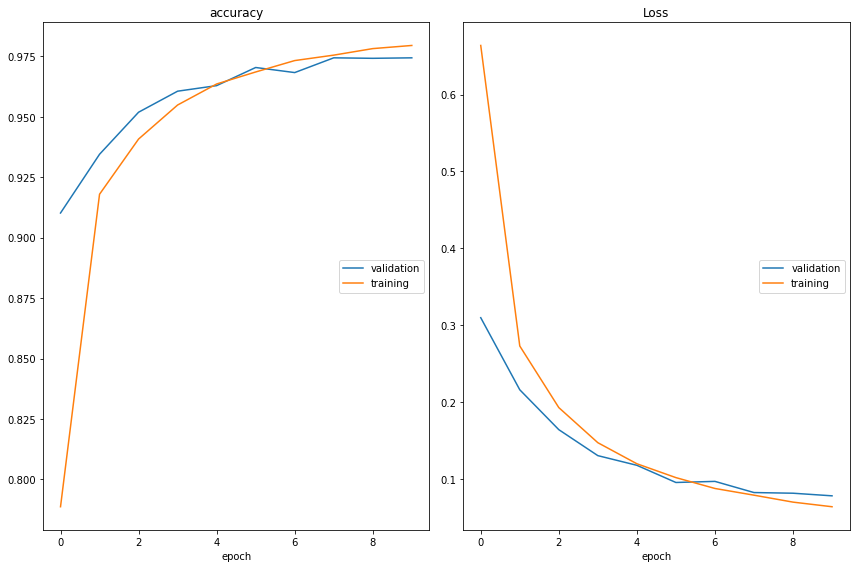

accuracy
	validation       	 (min:    0.910, max:    0.974, cur:    0.974)
	training         	 (min:    0.789, max:    0.980, cur:    0.980)
Loss
	validation       	 (min:    0.079, max:    0.310, cur:    0.079)
	training         	 (min:    0.064, max:    0.664, cur:    0.064)


In [13]:
#use livelossplot to show the curve
from livelossplot import PlotLossesKeras

model.fit(x_train, y_train,
          epochs=10,
          validation_data=(x_test, y_test),
          callbacks=[PlotLossesKeras()],
          verbose=1)

In [14]:
#pull the loss and accuracy from the model
loss, accuracy = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 4s 389us/step


In [15]:
loss

0.07850485694166273

In [16]:
accuracy

0.974399983882904